In [4]:
#importing Data and Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
#import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
import os
path=r"C:\Users\rchukka\Desktop\Quartic Assignment\ds_data_big\ds_data"
os.chdir(path)
import datetime
import time


In [6]:
# Load train and Test set
train = pd.read_csv("./data_train.csv")
test = pd.read_csv("./data_test.csv")

In [5]:
# Check the numbers of samples and features
print("train data size  : {} ".format(train.shape))
print("test data size  : {} ".format(test.shape))


train data size  : (596000, 58) 
test data size  : (892816, 57) 


In [14]:
test['target']=""
train_data=pd.DataFrame(train)
train_data.drop('id',axis=1,inplace=True)

In [16]:
train_data

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
0,2,5,0,1,0,0,0,0,0,0,...,NaN,0,1.0,4,1.0,0,0.0,1,12,0
1,1,7,0,0,1,0,0,0,0,0,...,NaN,0,NaN,11,1.0,1,2.0,1,19,0
2,5,9,0,0,1,0,0,0,0,0,...,NaN,0,NaN,14,1.0,1,2.0,1,60,0
3,0,2,1,0,0,0,0,0,0,0,...,0.0,0,1.0,11,1.0,1,3.0,1,104,0
4,0,0,1,0,0,0,0,0,0,0,...,NaN,0,NaN,14,1.0,1,2.0,1,82,0
5,5,4,0,0,0,1,0,0,0,0,...,NaN,0,0.0,14,1.0,1,0.0,1,104,0
6,2,3,0,1,0,0,0,0,0,0,...,NaN,0,1.0,11,1.0,1,0.0,1,99,0
7,5,4,1,0,0,0,0,0,0,0,...,0.0,0,0.0,11,1.0,1,2.0,1,30,0
8,5,3,0,0,1,0,0,0,0,0,...,NaN,0,1.0,14,1.0,1,0.0,1,68,0
9,1,2,0,1,0,0,0,0,0,0,...,0.0,1,0.0,14,1.0,1,2.0,1,104,1


In [19]:
test_data=pd.DataFrame(test)
test_data.drop('id',axis=1,inplace=True)
test_data

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
0,0,8,0,1,0,0,0,0,0,0,...,NaN,0,NaN,1,1.0,1,2.0,1,65,
1,4,5,0,0,0,1,0,0,0,0,...,NaN,0,0.0,11,1.0,1,0.0,1,103,
2,5,3,0,0,0,1,0,0,0,0,...,NaN,0,NaN,14,1.0,1,2.0,1,29,
3,0,6,1,0,0,0,0,0,0,0,...,NaN,0,NaN,1,1.0,1,2.0,1,40,
4,5,7,0,0,0,1,0,0,0,0,...,NaN,0,NaN,11,1.0,1,2.0,1,101,
5,0,6,1,0,0,0,0,0,0,0,...,NaN,0,NaN,11,0.0,0,2.0,1,11,
6,0,3,0,1,0,0,0,0,0,0,...,NaN,0,0.0,1,1.0,1,0.0,1,10,
7,0,0,1,0,0,0,0,0,0,0,...,NaN,0,NaN,11,1.0,1,2.0,1,103,
8,0,7,0,1,0,0,0,0,0,0,...,1.0,1,0.0,2,NaN,0,0.0,1,104,
9,1,6,0,0,0,1,0,0,0,0,...,NaN,0,NaN,4,1.0,1,2.0,1,104,


In [20]:
# Getting Description
train_data.describe()

,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
count,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,...,184208.000000,596000.000000,329072.000000,596000.000000,584497.000000,596000.000000,595430.000000,596000.000000,596000.000000,596000.000000
mean,1.900423,4.423356,0.393743,0.257015,0.163933,0.185309,0.000374,0.001693,0.009435,0.000948,...,0.601744,0.725106,0.525365,6.555000,0.947608,0.832077,1.331161,0.992136,62.215570,0.036436
std,1.983855,2.699861,0.488579,0.436988,0.370215,0.388548,0.019340,0.041111,0.096672,0.030775,...,0.489540,2.153319,0.499357,5.501419,0.222817,0.373798,0.976544,0.091613,33.012105,0.187373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,0.000000
50%,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,0.000000
75%,3.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000,0.000000
max,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000,1.000000


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596000 entries, 0 to 595999
Data columns (total 57 columns):
num1      596000 non-null int64
num2      596000 non-null int64
num3      596000 non-null int64
num4      596000 non-null int64
num5      596000 non-null int64
num6      596000 non-null int64
num7      596000 non-null int64
num8      596000 non-null int64
num9      596000 non-null int64
num10     596000 non-null int64
num11     596000 non-null int64
num12     596000 non-null int64
num13     596000 non-null int64
num14     596000 non-null int64
num15     596000 non-null int64
num16     596000 non-null float64
num17     596000 non-null float64
num18     488091 non-null float64
num19     595995 non-null float64
num20     595999 non-null float64
num21     596000 non-null float64
num22     553333 non-null float64
num23     596000 non-null float64
der1      596000 non-null float64
der2      596000 non-null float64
der3      596000 non-null float64
der4      596000 non-null int64
der

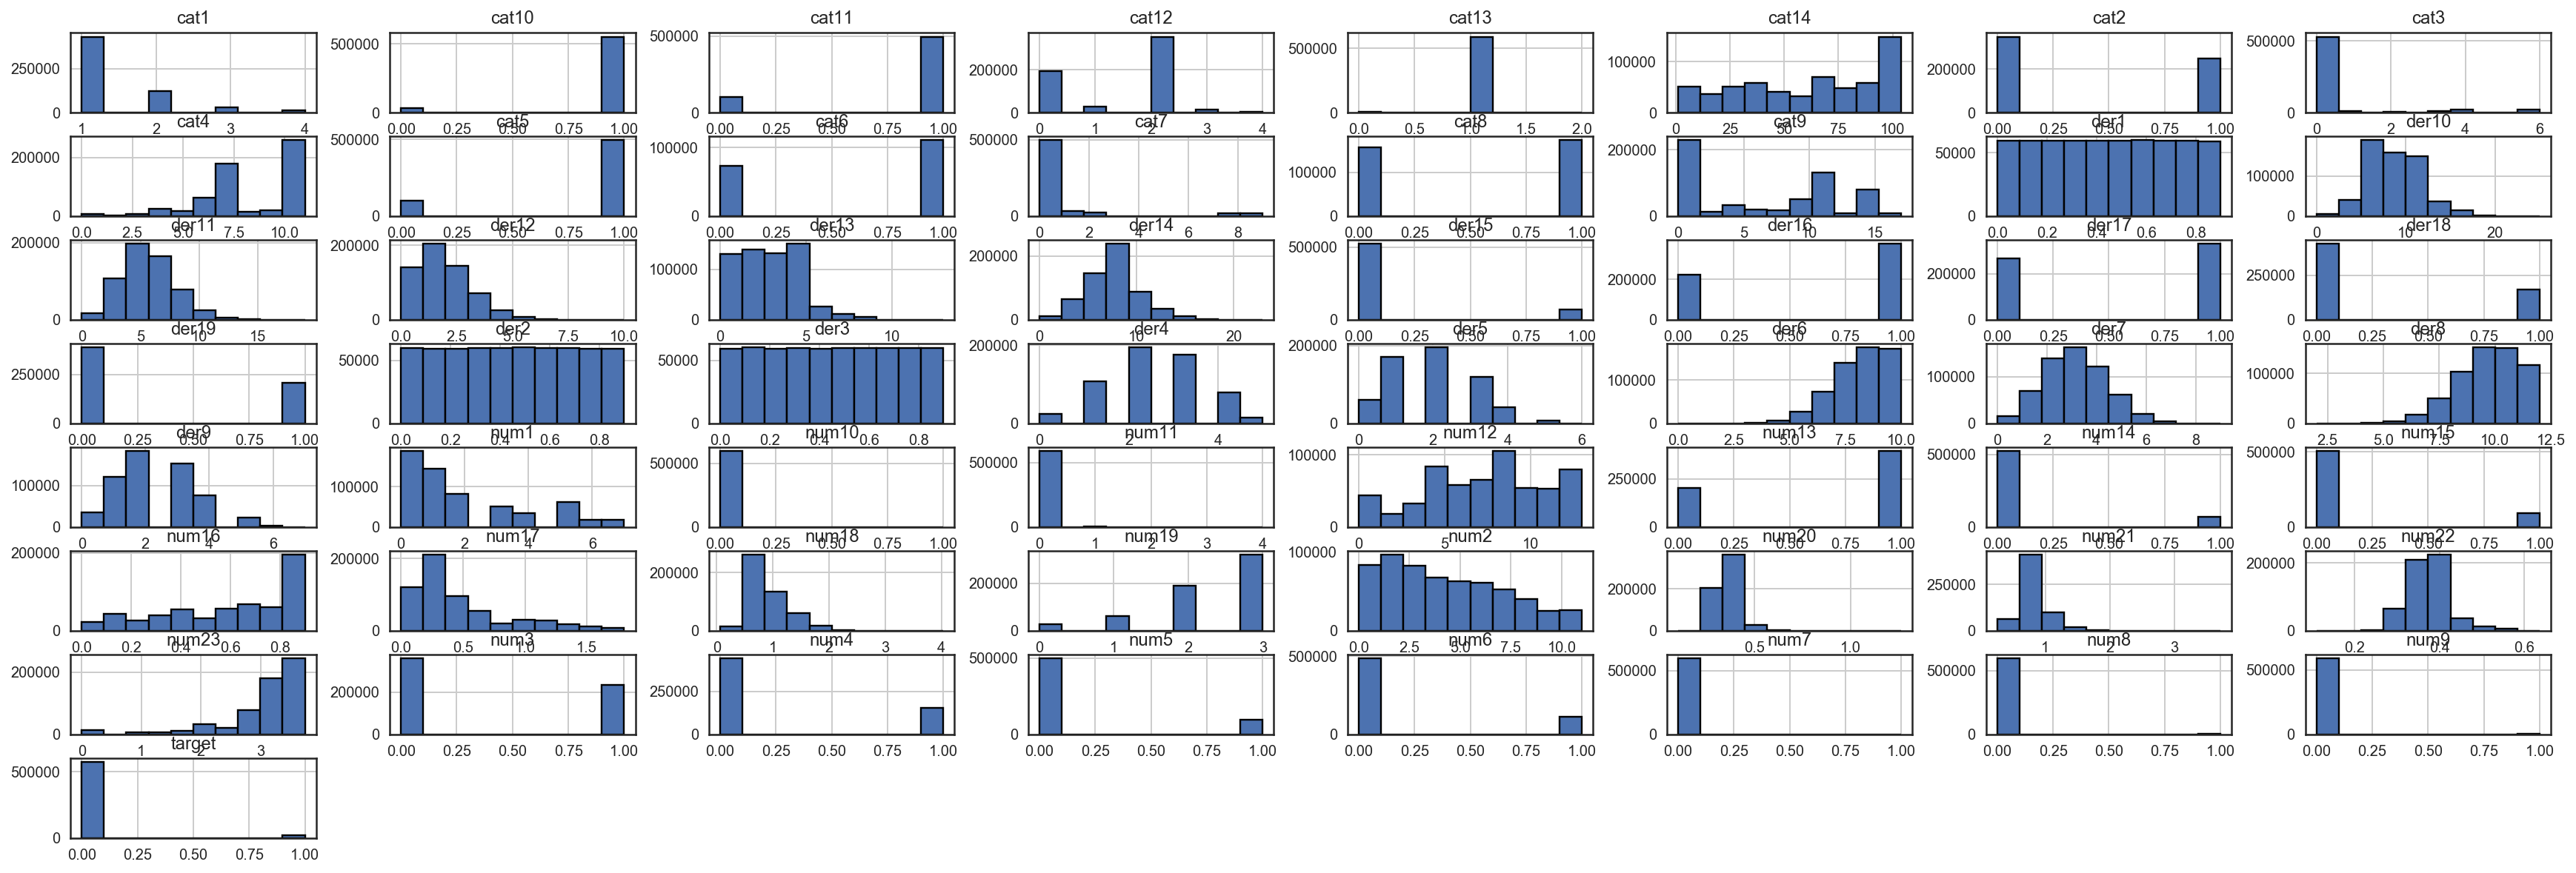

In [22]:
train_data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(30,10)
plt.show()

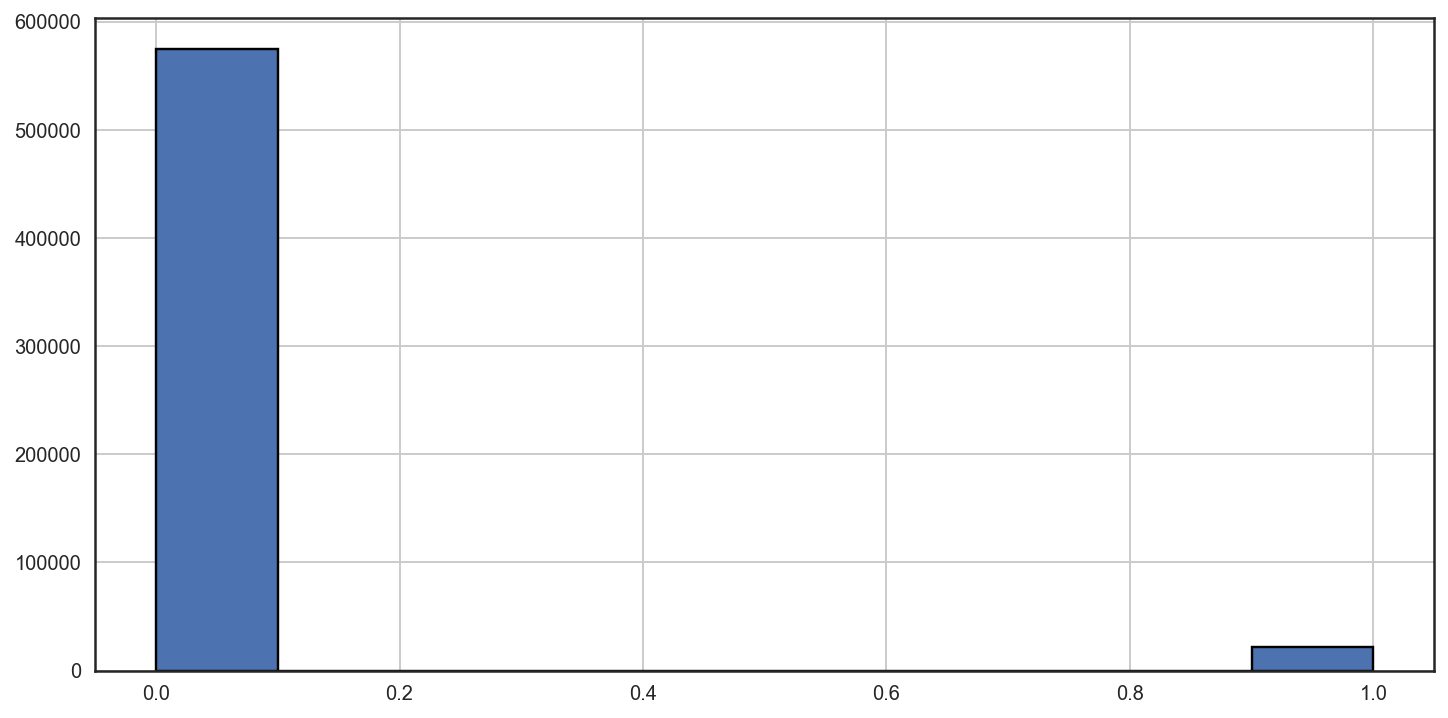

In [23]:
train_data['target'].hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [24]:
for i in train_data:
        print(i , ":", train_data[i].unique())


num1 : [2 1 5 0 4 3 6 7]
num2 : [ 5  7  9  2  0  4  3  1 11  6  8 10]
num3 : [0 1]
num4 : [1 0]
num5 : [0 1]
num6 : [0 1]
num7 : [0 1]
num8 : [0 1]
num9 : [0 1]
num10 : [0 1]
num11 : [0 1 2 3 4]
num12 : [11  3 12  8  9  6 13  4 10  5  7  2  0  1]
num13 : [0 1]
num14 : [1 0]
num15 : [0 1]
num16 : [0.7 0.8 0.  0.9 0.6 0.5 0.4 0.3 0.2 0.1]
num17 : [0.2 0.4 0.  0.6 1.8 0.1 0.7 1.4 0.9 0.3 0.5 0.8 1.  1.3 1.6 1.5 1.2 1.1
 1.7]
num18 : [0.71807033 0.76607767        nan ... 1.60078106 1.63075903 1.74355958]
num19 : [ 2.  3.  1.  0. nan]
num20 : [0.4        0.31622777 0.37416574 0.31606961 0.44598206 0.44698993
 0.4472136  0.54772256 0.31527766 0.42426407 0.52915026 0.39987498
 0.40841156 0.38729833 0.42355637 0.4237924  0.36055513 0.39749214
 0.51961524 0.41797129 0.48989795 0.42201896 0.31559468 0.44586994
 0.39862263 0.56568542 0.64807407 0.39974992 0.59160798 0.47958315
 0.5        0.36878178 0.43588989 0.57445626 0.6164414  0.44710178
 0.31575307 0.44542115 0.6        0.39949969 0.5451605

In [26]:
for i in train_data:
        len_unique=len(train_data[i].unique())
        len_total=len(train_data[i])
        percentage_unique= len_unique / len_total
        if(percentage_unique <= 0.05):
                print(i ,": categorical")
        else:
                print(i,": continious")
        

num1 : categorical
num2 : categorical
num3 : categorical
num4 : categorical
num5 : categorical
num6 : categorical
num7 : categorical
num8 : categorical
num9 : categorical
num10 : categorical
num11 : categorical
num12 : categorical
num13 : categorical
num14 : categorical
num15 : categorical
num16 : categorical
num17 : categorical
num18 : categorical
num19 : categorical
num20 : categorical
num21 : continious
num22 : categorical
num23 : categorical
der1 : categorical
der2 : categorical
der3 : categorical
der4 : categorical
der5 : categorical
der6 : categorical
der7 : categorical
der8 : categorical
der9 : categorical
der10 : categorical
der11 : categorical
der12 : categorical
der13 : categorical
der14 : categorical
der15 : categorical
der16 : categorical
der17 : categorical
der18 : categorical
der19 : categorical
cat1 : categorical
cat2 : categorical
cat3 : categorical
cat4 : categorical
cat5 : categorical
cat6 : categorical
cat7 : categorical
cat8 : categorical
cat9 : categorical
cat10 : 

In [27]:
pd.Categorical(train_data)

[num1, num2, num3, num4, num5, ..., cat11, cat12, cat13, cat14, target]
Length: 57
Categories (57, object): [cat1, cat10, cat11, cat12, ..., num7, num8, num9, target]

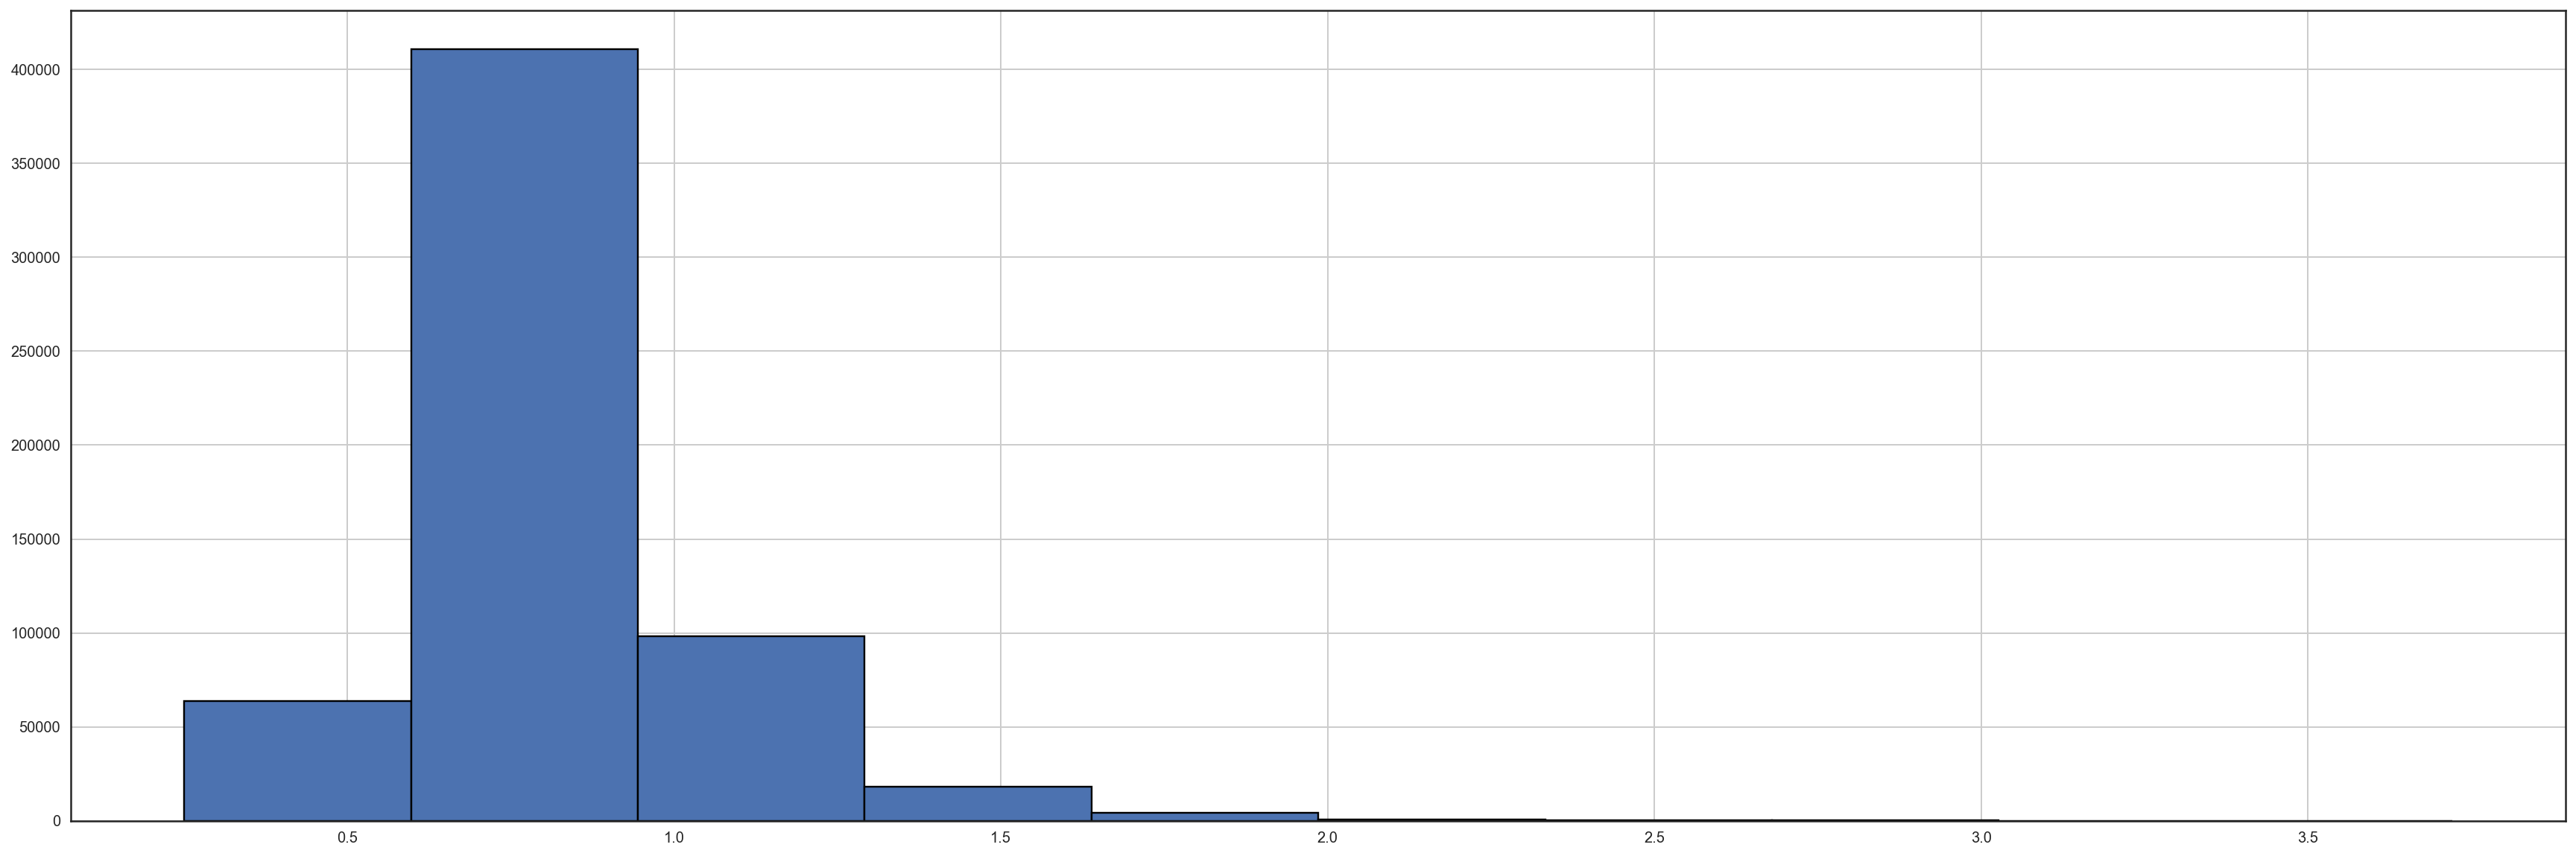

In [28]:
train_data['num21'].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(30,10)
plt.show()


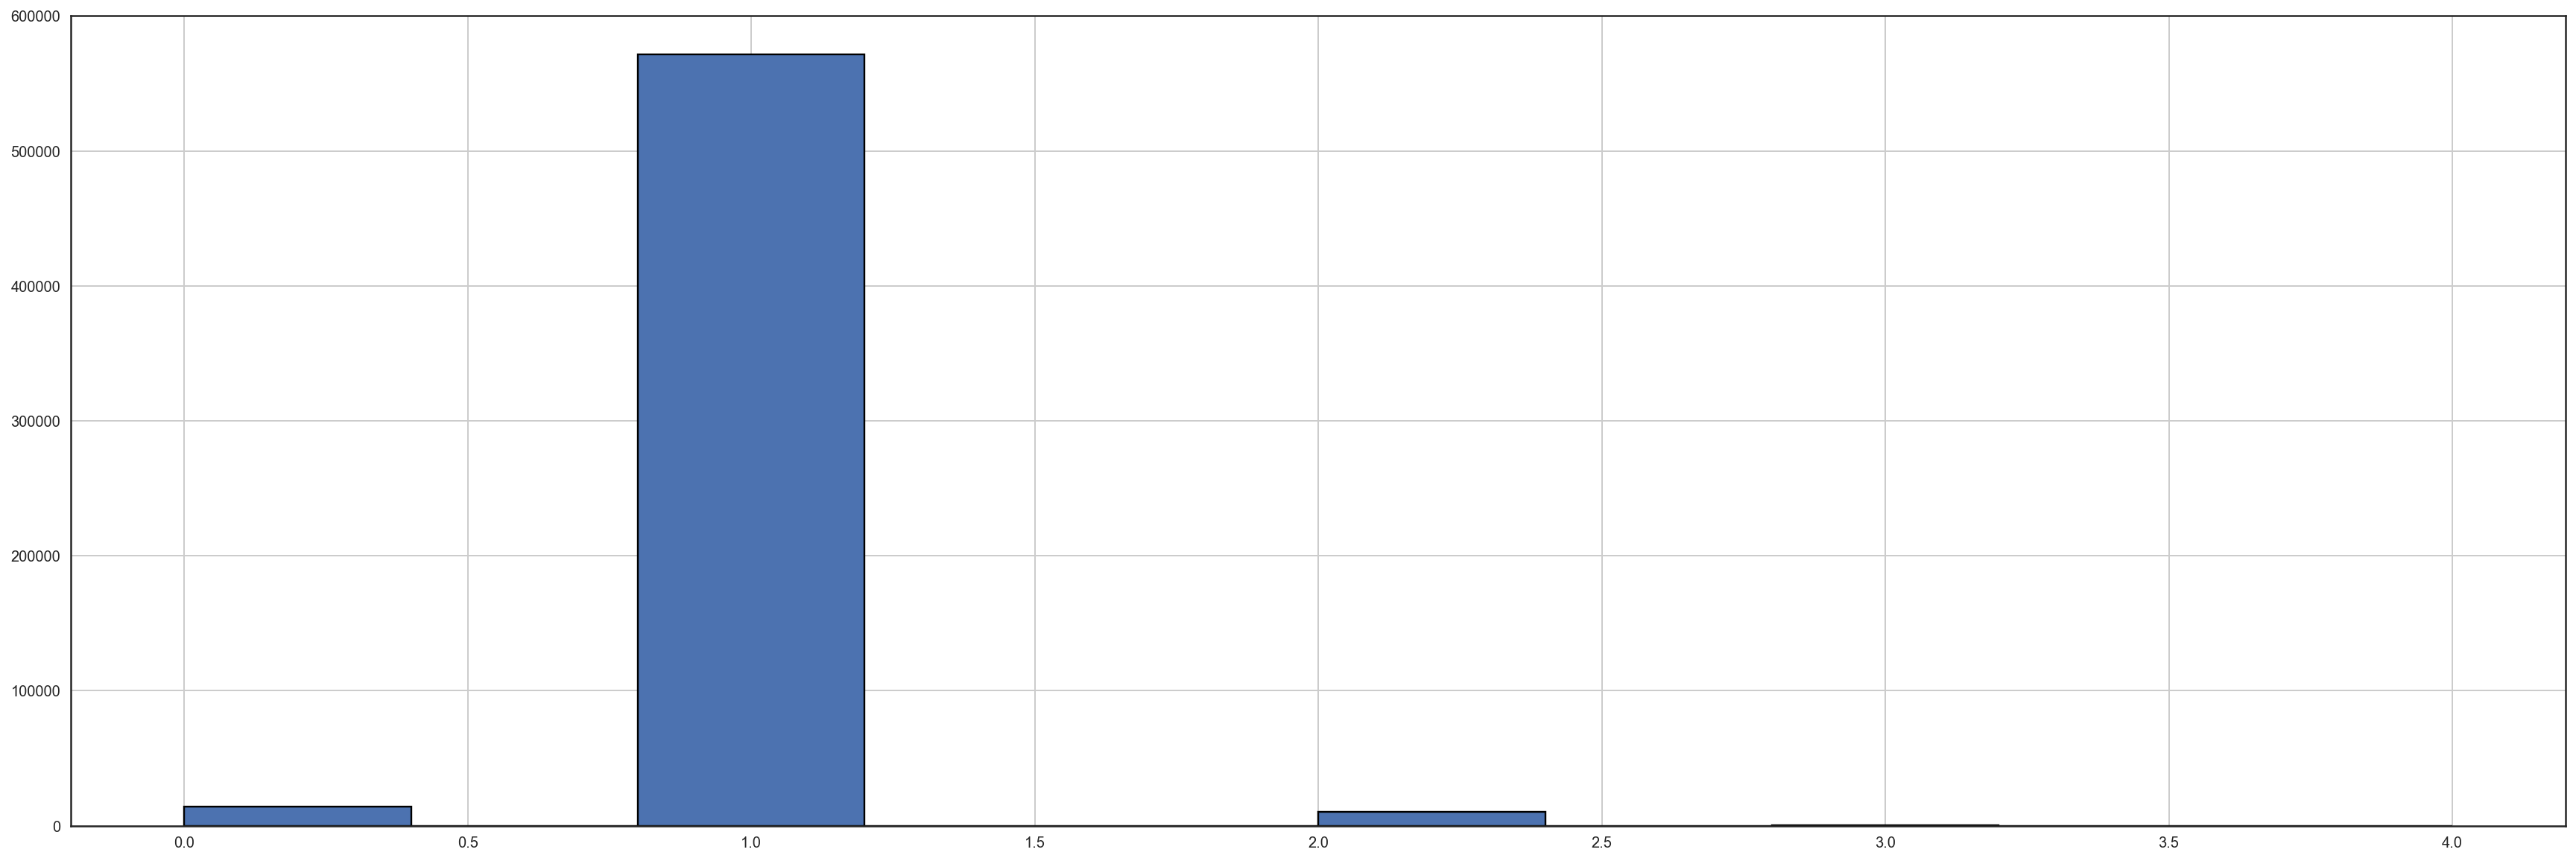

array([1., 2., 0., 3., 4.])

In [29]:
k=round(train_data['num21'])
k.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(30,10)
plt.show()
k.unique()

In [30]:
train['num21']=round(train['num21'])
train['num21']


0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        2.0
16        1.0
17        1.0
18        1.0
19        0.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        1.0
         ... 
595970    1.0
595971    1.0
595972    1.0
595973    1.0
595974    1.0
595975    1.0
595976    1.0
595977    1.0
595978    1.0
595979    1.0
595980    1.0
595981    1.0
595982    1.0
595983    1.0
595984    1.0
595985    1.0
595986    1.0
595987    1.0
595988    1.0
595989    1.0
595990    1.0
595991    1.0
595992    1.0
595993    1.0
595994    1.0
595995    1.0
595996    1.0
595997    1.0
595998    1.0
595999    1.0
Name: num21, Length: 596000, dtype: float64

In [31]:
# Find Missing Ratio of Dataset
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data

,Missing Ratio
cat6,69.092617
cat8,44.786577
num18,18.105537
num22,7.158893
cat10,1.930034
cat3,0.975503
cat12,0.095638
cat1,0.036409
cat4,0.017953
cat2,0.013926


Text(0.5,1,'Percent missing data by feature')

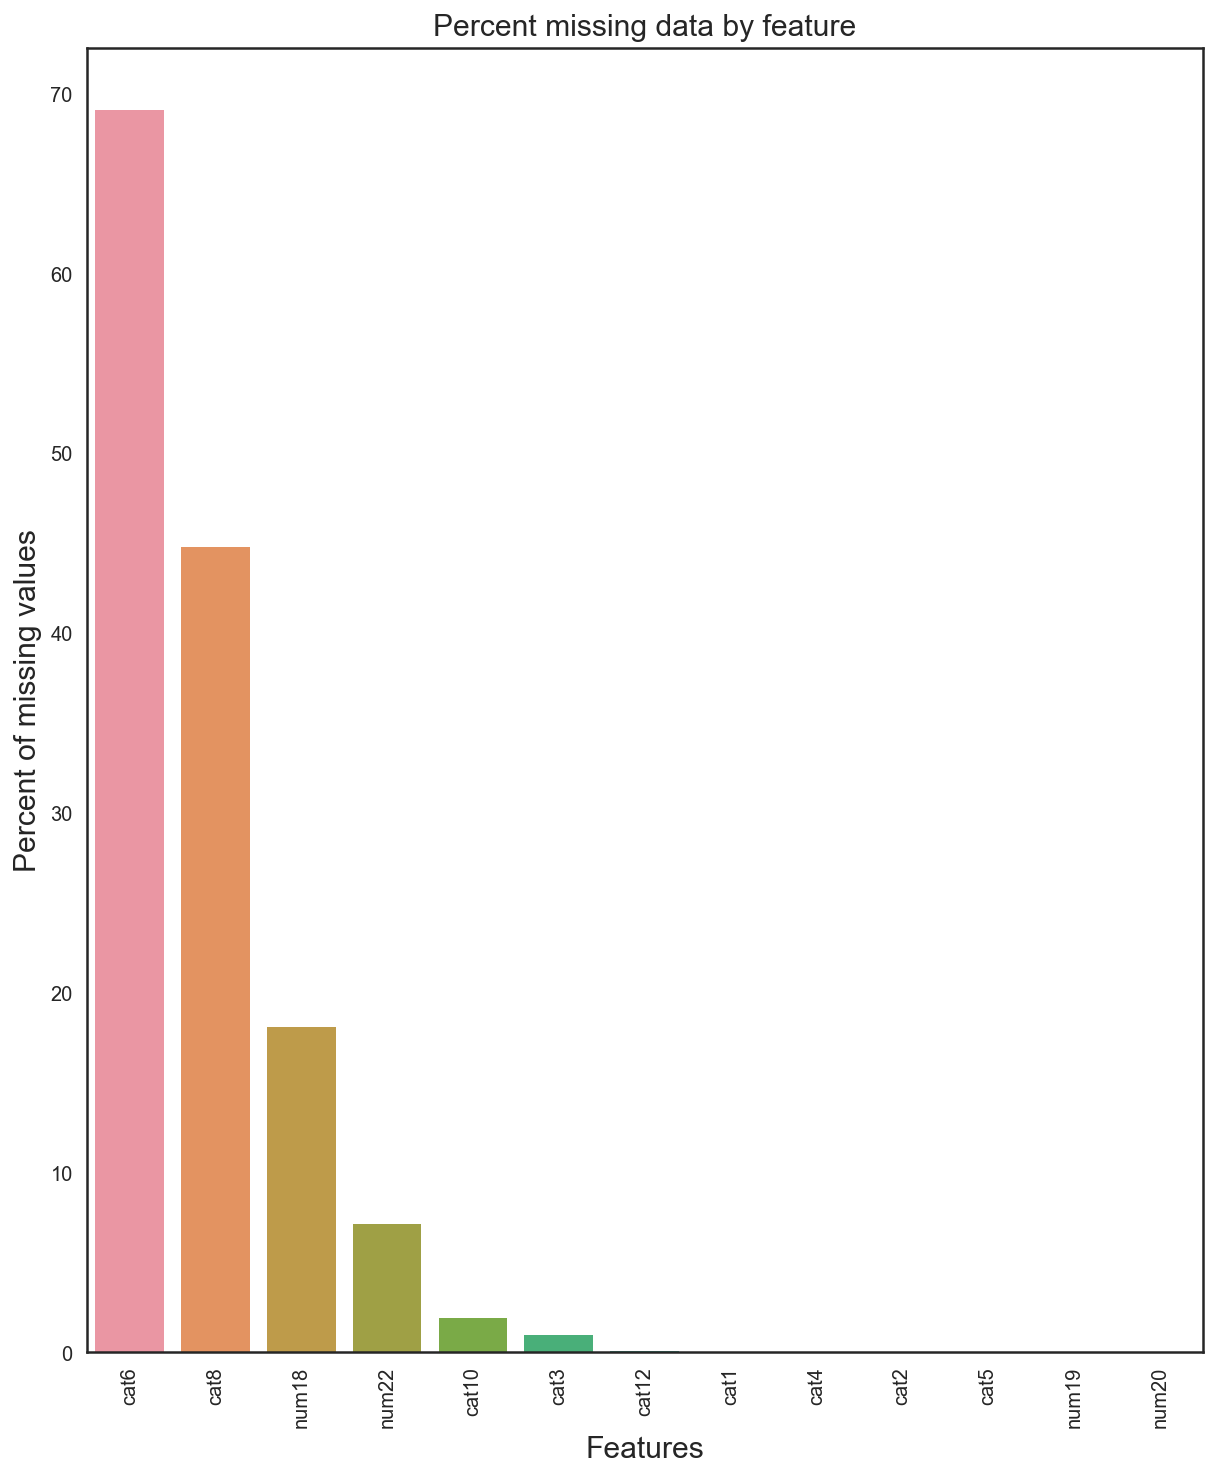

In [32]:
#Percent missing data by feature
f, ax = plt.subplots(figsize=(10, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [39]:
#Impute Missing Data and Clean Data
for i in train:
        train[i]=train[i].fillna(train.mode)

In [41]:
train

RecursionError: maximum recursion depth exceeded while calling a Python object

RecursionError: maximum recursion depth exceeded

In [27]:
# Find Missing Ratio of Dataset
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data

,Missing Ratio


In [57]:
for i in train:
        train[i]= train[i].astype('int')   

TypeError: int() argument must be a string, a bytes-like object or a number, not 'method'

In [48]:
train.dtypes

id        object
num1      object
num2      object
num3      object
num4      object
num5      object
num6      object
num7      object
num8      object
num9      object
num10     object
num11     object
num12     object
num13     object
num14     object
num15     object
num16     object
num17     object
num18     object
num19     object
num20     object
num21     object
num22     object
num23     object
der1      object
der2      object
der3      object
der4      object
der5      object
der6      object
der7      object
der8      object
der9      object
der10     object
der11     object
der12     object
der13     object
der14     object
der15     object
der16     object
der17     object
der18     object
der19     object
cat1      object
cat2      object
cat3      object
cat4      object
cat5      object
cat6      object
cat7      object
cat8      object
cat9      object
cat10     object
cat11     object
cat12     object
cat13     object
cat14     object
target    object
dtype: object

In [42]:

# Import train_test_split
from sklearn.cross_validation import train_test_split
target=train['target']
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train, 
                                                    target,
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
X_train[:100]

Training set has 476800 samples.
Testing set has 119200 samples.


,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
426423,426423,2,7,0,1,0,0,0,0,0,...,1,0,0,11,1,1,2,1,19,1
507465,507465,2,10,0,0,1,0,0,0,0,...,<bound method Series.mode of 0 NaN\n1 ...,2,<bound method Series.mode of 0 1.0\n1 ...,0,1,0,2,1,100,0
359019,359019,4,4,0,0,1,0,0,0,0,...,<bound method Series.mode of 0 NaN\n1 ...,2,<bound method Series.mode of 0 1.0\n1 ...,11,0,1,2,1,94,0
251426,251426,3,4,0,1,0,0,0,0,0,...,1,9,0,10,1,0,2,1,104,0
68627,68627,0,1,1,0,0,0,0,0,0,...,<bound method Series.mode of 0 NaN\n1 ...,0,<bound method Series.mode of 0 1.0\n1 ...,15,1,1,2,1,5,0
282305,282305,3,7,1,0,0,0,0,0,0,...,<bound method Series.mode of 0 NaN\n1 ...,0,1,11,1,1,0,1,99,0
528124,528124,0,0,1,0,0,0,0,0,0,...,0,0,1,11,<bound method Series.mode of 0 1.0\n1 ...,1,2,1,103,0
68941,68941,2,10,0,0,0,1,0,0,0,...,0,0,1,11,1,1,3,1,99,0
285807,285807,1,2,1,0,0,0,0,0,0,...,<bound method Series.mode of 0 NaN\n1 ...,0,0,6,1,1,0,1,104,0
369051,369051,0,5,1,0,0,0,0,0,0,...,1,0,0,0,1,0,2,1,22,0


In [ ]:
def specify_models():
    
    knear={'name':'K Nearest Neighbors Classifier',
           'class':sklearn.neighbors.KNeighborsClassifier(),
            'parameters':{'n_neighbors':range(1,12)}
          }
           
    svc_linear={'name':'Support Vector Classifier with Linear Kernel',
               'class':sklearn.svm.LinearSVC(),
                'parameters':{'C':[0.001,0.01,0.1,1,10,100]}
          }  
    
    sv_radial={'name':'Support Vector Classifier with Radial Kernel',
               'class':sklearn.svm.SVC(kernel='rbf'),
                'parameters':{'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100]}
          }      
    
    loglas={'name':"Logistic Regression with LASSO",
             'class':sklearn.linear_model.LogisticRegression(penalty='l1'),
             'parameters':{'C':[0.001,0.01,0.1,1,10,100]}
            }  
    
    sgdc={'name':"Stochastic Gradient Descent Classifier",
            'class':sklearn.linear_model.SGDClassifier(),
            'parameters':{'max_iter':[100,1000],'alpha':[0.0001,0.001,0.01,0.1]}
            }  
    
    decis_tree={'name':"Decision Tree Classifier",
            'class':sklearn.tree.DecisionTreeClassifier(),
            'parameters':{'max_depth':range(3,15)}
            } 
    
    ranfor={'name':"Random Forest Classifier",
            'class':sklearn.ensemble.RandomForestClassifier(),
            'parameters':{'n_estimators':[10,20,50,100,200]}
            } 
    
    extrerantree={'name':"Extremely Randomized Trees Classifier",
                    'class':sklearn.ensemble.ExtraTreesClassifier(),
                    'parameters':{'n_estimators':[10,20,50,100,200]}
                 } 
   
    
    lis=list([knear,svc_linear,sv_radial,loglas,sgdc,decis_tree,ranfor,extrerantree])
    
    return(lis)

In [29]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall

# TODO: Calculate accuracy

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

target_pred=target.apply(lambda x:1)

TP=sum(map(lambda x,y: 1 if x==1 and y==1 else 0, target,target_pred)) #True Positives
FP=sum(map(lambda x,y: 1 if x==0 and y==1 else 0, target,target_pred)) #False Positives
FN=sum(map(lambda x,y: 1 if x==1 and y==0 else 0, target,target_pred)) #False Negitives 

# accuracy = TP/(TP+FP)
accuracy = float(TP)/(TP+FP)

# The commented code below was used to confirm the precision calculation was correct
#accuracy1 = accuracy_score(income,income_pred)
#print 'accuracy comparison',accuracy,accuracy1

# recall = TP/(TP+FN)
recall=float(TP)/(TP+FN)

# The commented code below was used to confirm the recall calculation was correct
#recal1=recall_score(income,income_pred)
#print 'recall comparison',recal1,recall1

# TODO: Calculate F-score using the formula above for beta = 0.5
beta=0.5
fscore = (1+beta**2)*(accuracy*recall)/(beta**2*accuracy+recall)

#fscore1=fbeta_score(income,income_pred, beta=0.5)
#print 'fscore comparison',fscore,fscore1

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.0364, F-score: 0.0451]


In [31]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start 
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_test[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5) 
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [41]:
from time import time
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = SVC(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = X_train.shape[0]
samples_10 = int((X_train.shape[0] * 10)/100)
samples_1 = int(X_train.shape[0]/100)

train_predict(SV, samples_100, X_train, y_train, X_test, y_test)

TypeError: float() argument must be a string or a number, not 'method'

In [36]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] += 1

There are 8 skewed numerical features to Box Cox transform


In [37]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(14793, 8)


In [38]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [39]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [40]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [41]:
#Modeling and Predictions
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [42]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.4357 (0.0197)

ElasticNet score: 0.4357 (0.0197)

Kernel Ridge score: 0.3878 (0.0121)

Gradient Boosting score: 0.2999 (0.0063)

LGBM score: 0.3657 (0.0089)



In [43]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [44]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.3667 (0.0146)



In [45]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(clf)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [46]:

stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.2994 (0.0063)


In [47]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [48]:
#Stacked models
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.24698752813166977


In [49]:
#LightGBM
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.3604571964137084


In [50]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 + lgb_train_pred*0.20 ))

RMSLE score on train data:
0.5198890425124927


In [51]:
#Ensemble Prediction
# Example
Stacked = 1/(0.1077)
LGBM = 1/(0.1159)
Sum = Stacked + LGBM
Stacked = Stacked/Sum
LGBM = LGBM/Sum
print(Stacked,LGBM)

0.5183363148479426 0.4816636851520572


In [52]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*Stacked  + lgb_train_pred*LGBM))

RMSLE score on train data:
0.2877191830783932


In [53]:
ensemble = stacked_pred*Stacked + lgb_pred*LGBM
ensemble

array([ 60.98421862, 308.80125989, 224.26820091, ...,  48.44324059,
        53.39348167,  62.86156862])

In [56]:
#Submission
sub = pd.DataFrame()
sub['price'] = ensemble
sub.to_csv(os.path.join(path,r'submission.csv'),index=False)

In [65]:
#Writing .csv file to .xlsx format
from openpyxl import Workbook
import csv


wb = Workbook()
ws = wb.active
with open('./submission.csv', 'r') as f:
    for row in csv.reader(f):
        ws.append(row)
wb.save(os.path.join(path,r'Predicted_House_Prices.xlsx'))